# Bike Sharing Demand

## Attribute Information:

- **instant**: record index
- **dteday** : date
- **season** : season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not (extracted from [Web Link])
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Reading the CSv file
df = pd.read_csv('/content/hour.csv', parse_dates=True)

# Dropping instant as it the same as index column
df = df.drop('instant', axis=1)

# Showing the first five rows
df.head()


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [5]:
# Changing the type of column dteday from object to Datetime

df['dteday'] = pd.to_datetime(df['dteday'])

# 1) EDA

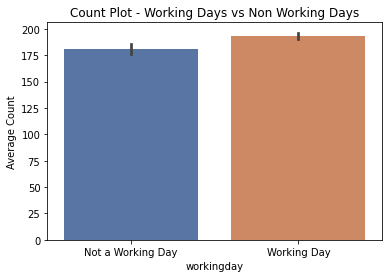

In [36]:
ax = sns.barplot(x = 'workingday', y = 'cnt', data = df, estimator = np.average,
            palette='deep')
ax.set_xticklabels(['Not a Working Day', 'Working Day'])
plt.ylabel('Average Count');
plt.title('Count Plot - Working Days vs Non Working Days');

**Slightly More people on average use bikes on Working Days**

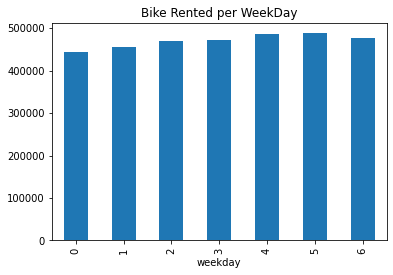

In [37]:
plt.figure(figsize=(6, 4))
ax = df.groupby('weekday')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rented per WeekDay');

**The use of bikes is same on all the days**

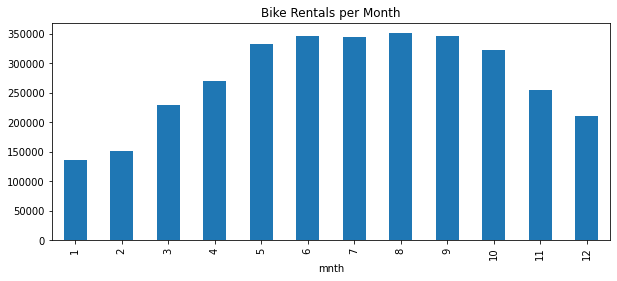

In [39]:
plt.figure(figsize=(10, 4))
ax = df.groupby('mnth')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rentals per Month');

**The use of Bikes peak around the months from August - Spetember**

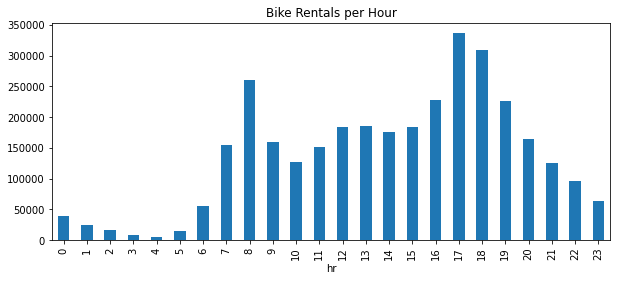

In [40]:
plt.figure(figsize=(10, 4))
ax = df.groupby('hr')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rentals per Hour');

- **The use of Rental bikes is very low during the early hours between 0-5**
- **The use of bikes increases during hours 7 - 9, this may be due to people going to work**
- **Alot more people use bikes during the hours of 17-19, this may be due to people returning from work**
- **Also more people use bikes for returning from work, this may be due to people are tired after a hard day of work**


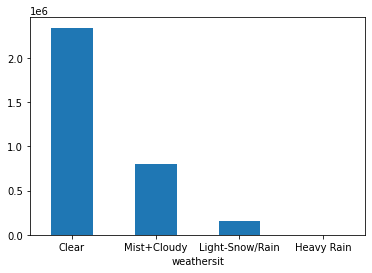

In [11]:
ax = df.groupby('weathersit')['cnt'].sum().plot(kind='bar')
ax.set_xticklabels(['Clear', 'Mist+Cloudy', 'Light-Snow/Rain', 'Heavy Rain'], rotation=0);
plt.title('Bike Rentals according to Weather Situation')

**People rent bikes mostly when the weather is Clear**

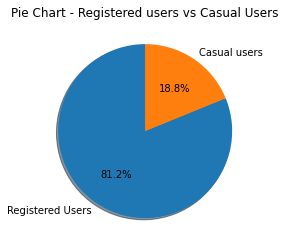

In [41]:
labels = 'Registered Users', 'Casual users'

registered_users = round(df['registered'].sum()/df['cnt'].sum()*100, 2)
casual_users = round(df['casual'].sum()/df['cnt'].sum()*100, 2)

sizes = [registered_users, casual_users]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.title('Pie Chart - Registered users vs Casual Users');

**Of all the bikes rented, 83% are used by Registered Users**

In [14]:
df.groupby('weekday').sum()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,
0,6231,1271,16231,28911,0,0,3408,1210.52,1164.6976,1571.24,470.6084,140521,303506,444027
1,6169,1244,16062,28649,357,2122,3548,1227.22,1179.7755,1575.78,468.1913,70784,384719,455503
2,6204,1231,15986,28509,23,2430,3621,1247.52,1195.0513,1569.51,470.7732,57843,411266,469109
3,6214,1246,16196,28530,24,2451,3677,1254.02,1196.7316,1595.93,463.2512,57319,415729,473048
4,6231,1246,16284,28555,48,2423,3465,1252.84,1198.4877,1506.39,474.4004,61460,423935,485395
5,6207,1248,16399,28670,48,2439,3512,1234.62,1173.4364,1526.62,463.6522,78238,409552,487790
6,6220,1248,16462,28847,0,0,3539,1210.40,1160.3154,1555.14,492.8296,153852,323955,477807


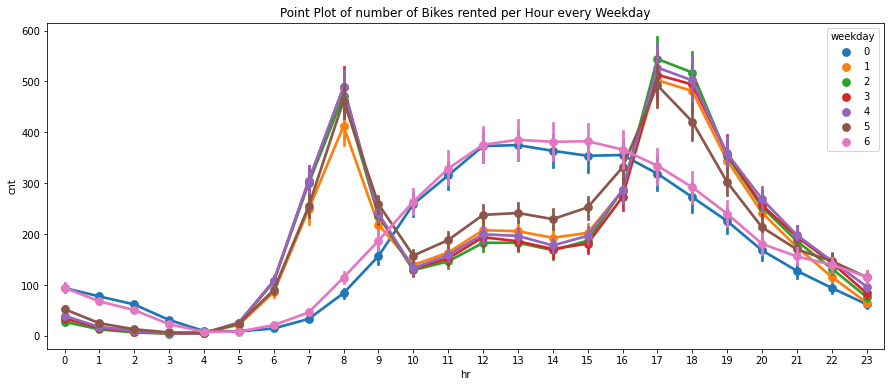

In [43]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', data=df, hue='weekday');
plt.title('Point Plot of number of Bikes rented per Hour every Weekday');

- **On weekends (Saturday/Sunday), there is an increase in the use of bikes between the hours (10-16) i.e afternoon and no peaks during the hours (7-9) and (5-7)**
- **During weekdays we can obseve an peak during the hours (7-9) and (5-7)**
- **During weekdays we can obseve an decrease of bike use during afternoon hours**

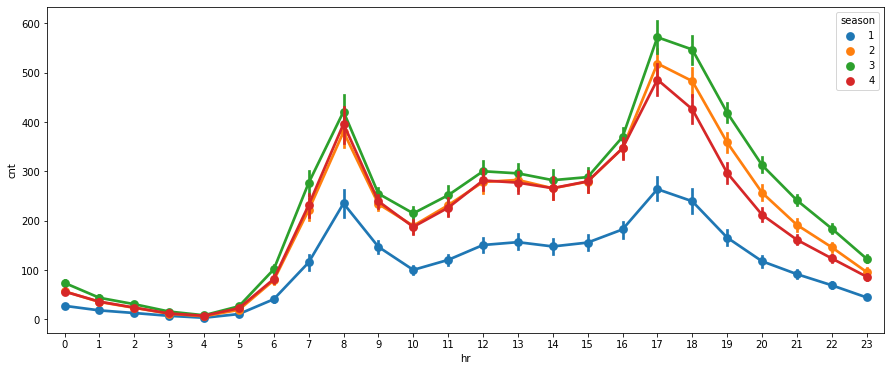

In [16]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', data=df, hue='season');
plt.title('Point Plot of number of Bikes rented per Hour every Season');

**We can see similar trends across all seasons for for bike use**

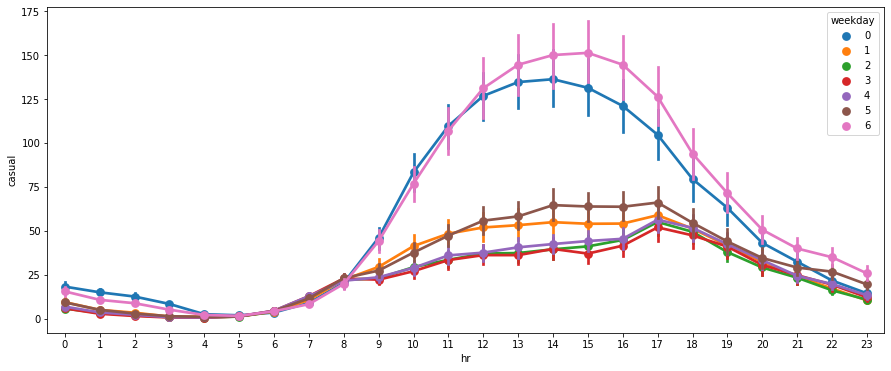

In [19]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='casual', data=df, hue='weekday');
plt.title('Point Plot of number of Bikes rented per Hour every Weekday for Casual Users');

- **We can see that there are no peaks for casual users during the work hours**
- **There is a substantial increase in the demand for bikes during the weekends for casual users during the afternoon hours, we do not observe such trend for registered users**

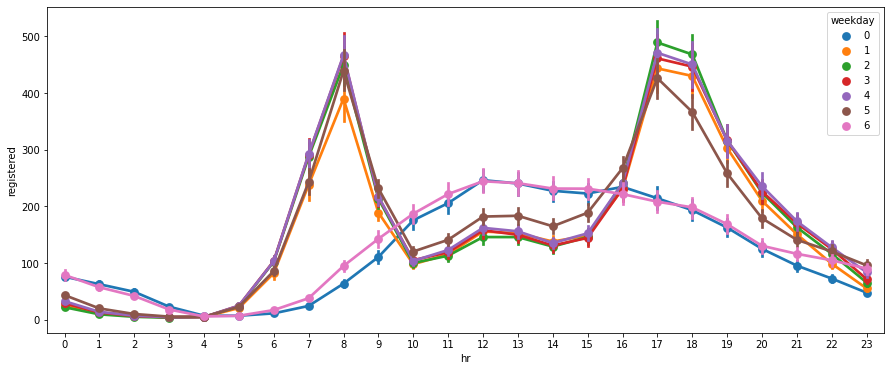

In [20]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='registered', data=df, hue='weekday');
plt.title('Point Plot of number of Bikes rented per Hour every Weekday for Registered Users');

- **We can observe a peek during the working hours for registered users,so we can conclude that most registered users use bikes to commute from work to home**

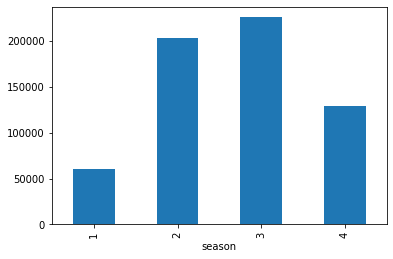

In [22]:
df.groupby('season')['casual'].sum().plot(kind='bar');

- **There is an increase in the use of bikes for seasons 2:spring, 3:summer, this may be due to the increase in the number of tourists visiting during the nicer seasons**

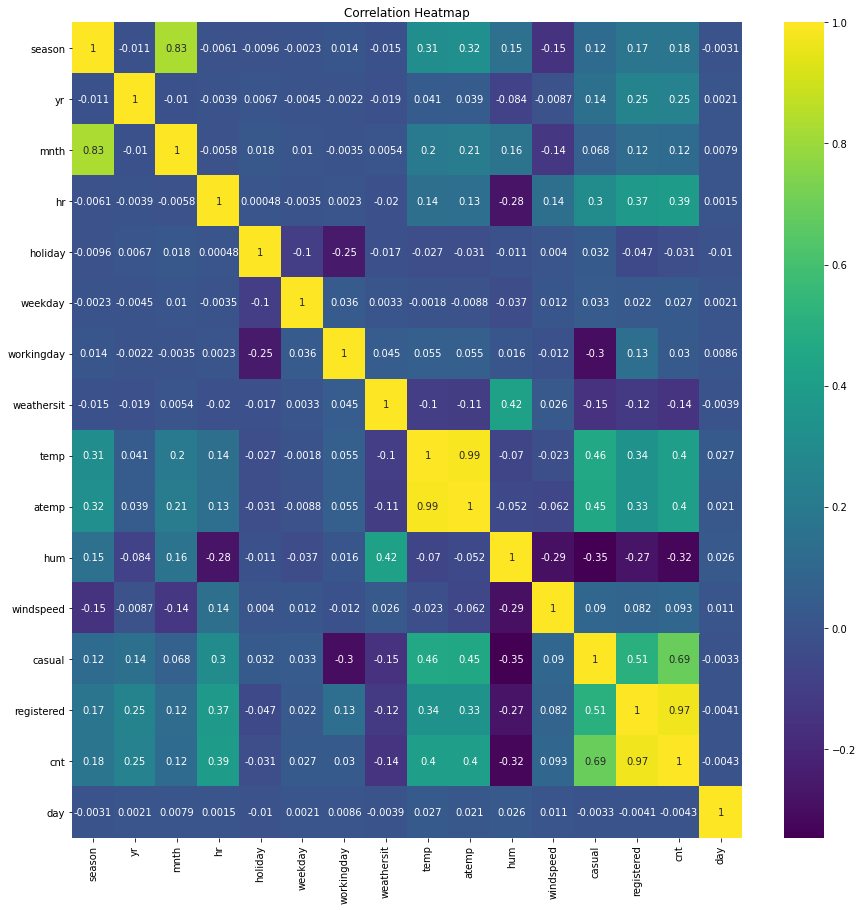

In [44]:
plt.figure(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap');

# 2) Modelling

In [28]:
# Dropping the columns not used as features
X = df.drop(['cnt', 'casual', 'registered', 'yr', 'dteday'], axis=1)

# Setting count as target
y = df['cnt']

from sklearn.model_selection import train_test_split

# Splitting our data into training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=1200, max_depth=25)

# Fitting to our Training Data
rf_reg.fit(X_train, y_train)

# Predicting values for test data
y_preds = rf_reg.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_preds, y_test))

0.41358592240786557

In [32]:
rf_reg.feature_importances_

array([0.02366149, 0.02043068, 0.5980948 , 0.00287115, 0.01727982,
       0.05522796, 0.02143883, 0.12978557, 0.02695262, 0.05125693,
       0.02399674, 0.02900342])

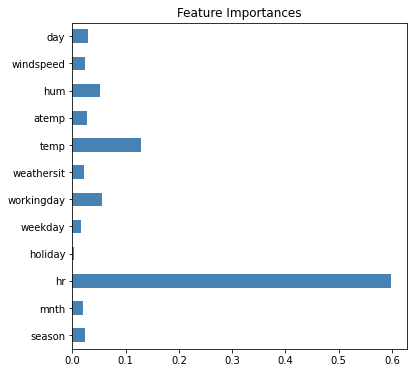

In [45]:
plt.figure(figsize=(6, 6))

pd.Series(rf_reg.feature_importances_, index=X.columns).plot.barh(color='steelblue');

plt.title('Feature Importances');

**We can see that the hour of day is the most important featurefor predicting the number of bikes rented**